In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import re
import string

from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize']= 14,6
plt.style.use('ggplot')

In [9]:
pd.set_option('display.max_colwidth', None)

In [12]:
# importation du dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TRAINING DATASCIENTEST/PROJET DATASCIENTEST/Archivage datas projets RAKUTEN/X_train_update.csv',index_col=0)
df.head()

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB


In [12]:
# ETUDE DE LA COLONNE DESIGNATION
df['designation'] = df['designation'].apply(lambda _: str(_))

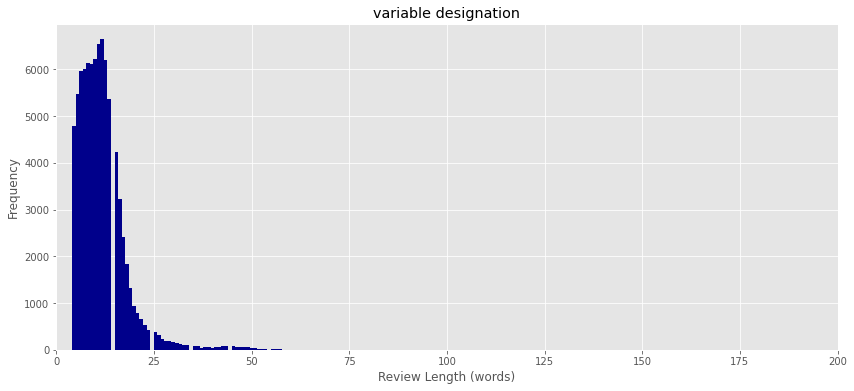

In [13]:
words_per_review = df.designation.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100, color='darkblue')
plt.title ('variable designation')
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.xlim(0,200)
plt.show()

In [14]:
print('Average words de la variable designation:', words_per_review.mean())
print('Skewness de la variable designation:', words_per_review.skew())

Average words de la variable designation: 11.650925620613313
Skewness de la variable designation: 2.438238052042657


In [15]:
# ETUDE DE LA COLONNE DESCRIPTION
df['description'] = df['description'].apply(lambda _: str(_))

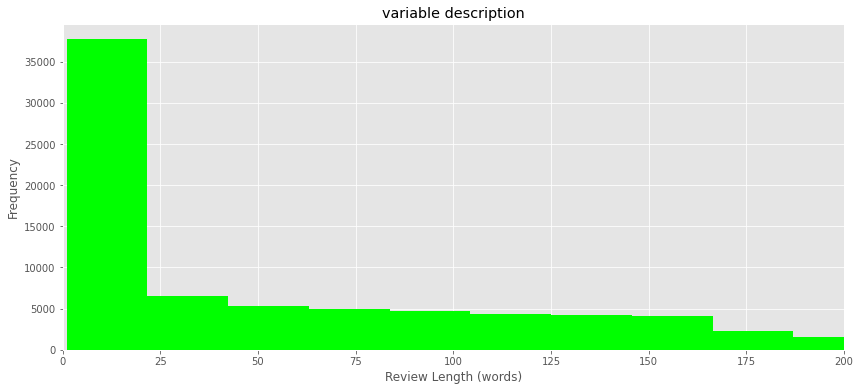

In [21]:
words_per_review2 = df.description.apply(lambda x: len(x.split(" ")))
words_per_review2.hist(bins = 100, color='lime')
plt.title ('variable description')
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.xlim(0,200)
plt.show()

In [ ]:
## exemple de sauvegarde des données (22052021)

In [35]:
 import pickle
 mypicklefile = words_per_review2
 with open('mypicklefile', 'wb') as f1:
    pickle.dump(mypicklefile, f1)

In [36]:
test = open('/content/mypicklefile','rb')
new_dict = pickle.load(test)


In [ ]:
print(new_dict)

In [39]:
test.close()

In [ ]:
########################################################################################

In [ ]:
print('Average words de la variable description:', words_per_review2.mean())
print('Skewness de la variable description:', words_per_review2.skew())

Average words de la variable description: 81.11347684770833
Skewness de la variable description: 3.1630647668569902


In [41]:
# ETUDE DE LA TARGET
target = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TRAINING DATASCIENTEST/PROJET DATASCIENTEST/Archivage datas projets RAKUTEN/Y_train_CVw08PX.csv',index_col=0)

In [42]:
df['target'] =target
df.head(1)

,designation,description,productid,imageid,target
0,Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design,nan,3804725264,1263597046,10


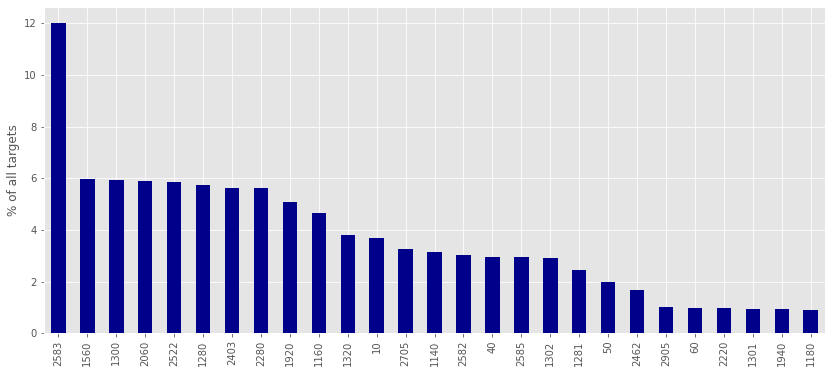

In [43]:
percent_target = 100 * df['target'].value_counts()/len(df)
percent_target.plot.bar(color='darkblue')
plt.ylabel('% of all targets')
plt.show()

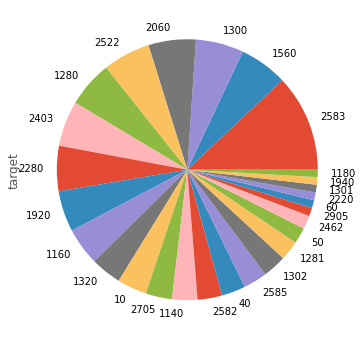

In [44]:
df['target'].value_counts().plot.pie()

In [45]:
# Removing all not alphanumeric characters (cleaning express 1)
df.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [46]:
# Converting headlines to lower case (cleaning express 2 )
index = df.columns
index

Index(['designation', 'description', 'productid', 'imageid', 'target'], dtype='object')

In [47]:
# Converting headlines to lower case (cleaning express 2 )
df['designation'] = df['designation'].str.lower() 
df['description'] = df['description'].str.lower() 

In [48]:
df.head(3)

,designation,description,productid,imageid,target
0,olivia personalisiertes notizbuch seiten punktraster ca din a rosen design,nan,3804725264,1263597046,10
1,journal des arts le n du l art et son marche salon d art asiatique a paris jacques barrere francois perrier la reforme des ventes aux encheres publiques le sna fete ses cent ans,nan,436067568,1008141237,2280
2,grand stylet ergonomique bleu gamepad nintendo wii u speedlink pilot style,pilot style touch pen de marque speedlink est stylet ergonomique pour gamepad nintendo wii u br pour un confort optimal et une pr cision maximale sur le gamepad de la wii u ce grand stylet hautement ergonomique est non seulement parfaitement adapt votre main mais aussi tr s l gant br il est livr avec un support qui se fixe sans adh sif l arri re du gamepad br br caract ristiques br mod le speedlink pilot style touch pen br couleur bleu br ref fabricant sl be br compatibilit gamepad nintendo wii u br forme particuli rement ergonomique excellente tenue en main br pointe rev tement longue dur e con ue pour ne pas ab mer l cran tactile br en bonus support inclu pour gamepad br span class vga style b b br,201115110,938777978,50


In [49]:
import nltk
nltk.download('punkt')
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
# tokenization (cleaning express 3 )
from nltk.tokenize import word_tokenize
def tok (tx):
        token =  word_tokenize(tx)
        return token

In [51]:
df['designation'] = df['designation'].apply(tok)

In [52]:
df['description'] = df['description'].astype(str).apply(tok)

In [53]:
# remove stopwords (cleaning express 4 )
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
eng_stop_words = stopwords.words('english')####### stopwords.words('french')
stopwords =  set (eng_stop_words)  #######

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords2 = nltk.corpus.stopwords.words('french')
list_a_nettoyer = ('e','haute',"l'",'x',"'",'p','lumi','re','de','une','li','que','vous','mat','riel','x','X','cm','vous','b','d','pour','les','peut','tre','et','les','carac','h''de ','la ',"l '",'x ', 'cm ', 'ristiques','mat ','riel ','vous ','pla ','br','diff','diff ','rent','rent ', 'rents','rents ','int', 'int ','rieur','rieur ','rieures','rieures ','id','id ','al','al ','ra','ra ','qualit','qualit ','pla','pla ','sine','sine ','r','r ','g','g ','rique','rique ','sistant','sistant','nan','nan ','tout','tout ','sine','sine ','sol','ge','ge ','div','div ','strong','strong ','temp','temp ','si','si ','h','h ','cor','cor ','con','con ','imperm','imperm ','able','able ','sp,', 'cification','cification ','ext', 'ext ','ger','amp','nbsp','ans','span','span ','sp','sp ','cifications','cifications ','rement','rement ','non','non ','comprend','comprend ', 'contenu','contenu ','v','v ','diff','diff ','rent','rent ','rents','rents ','int','int ','rieur', 'rieur ','u','u ','eacute','eacute ','pr','pr ','gr','gr ','tr','tr ','ul','ul ','f','f ')

In [55]:
# Création d'une liste fusionnée des stopwords french & english puis list à nettoyer
for i in stopwords2:
    stopwords.append(i)
for j in list_a_nettoyer:
    stopwords.append(j)

In [56]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [57]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords]
    return words

In [58]:
df['designation'] = df['designation'].apply(remove_stopwords)

In [59]:
df['description'] = df['description'].apply(remove_stopwords)

In [ ]:
# STEMMING OU LEMMATIZATION (cleaning optionnel 5 )
from nltk.stem import PorterStemmer, LancasterStemmer # Common stemmers
from nltk.stem import WordNetLemmatizer # Common Lematizer
nltk.download('wordnet')
from nltk.corpus import wordnet

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def stem(text):
    stemi = [ps.stem(word) for word in text]
    return stemi

In [60]:
df.head(3)

,designation,description,productid,imageid,target
0,"[olivia, personalisiertes, notizbuch, seiten, punktraster, ca, din, rosen, design]",[],3804725264,1263597046,10
1,"[journal, arts, art, marche, salon, art, asiatique, paris, jacques, barrere, francois, perrier, reforme, ventes, encheres, publiques, sna, fete, cent]",[],436067568,1008141237,2280
2,"[grand, stylet, ergonomique, bleu, gamepad, nintendo, wii, speedlink, pilot, style]","[pilot, style, touch, pen, marque, speedlink, stylet, ergonomique, gamepad, nintendo, wii, confort, optimal, cision, maximale, gamepad, wii, grand, stylet, hautement, ergonomique, seulement, parfaitement, adapt, main, aussi, gant, livr, support, fixe, sans, adh, sif, arri, gamepad, caract, mod, speedlink, pilot, style, touch, pen, couleur, bleu, ref, fabricant, sl, compatibilit, gamepad, nintendo, wii, forme, particuli, ergonomique, excellente, tenue, main, pointe, rev, tement, longue, dur, ue, ab, mer, cran, tactile, bonus, support, inclu, gamepad, class, vga, style]",201115110,938777978,50


In [61]:
# réalisation de la jointure des 2 colonnes texte du dataframe
headlines = []  #####
for row in range(0,len(df.index)):
    headlines.append(' '.join(str(x) for x in df.iloc[row,0:2]))

In [62]:
import pickle
NLPpicklefile = headlines
with open('NLPpicklefile', 'wb') as f1:
    pickle.dump(NLPpicklefile, f1)

In [3]:
import pickle

In [4]:
test = open('/content/drive/MyDrive/Colab Notebooks/TRAINING DATASCIENTEST/PROJET DATASCIENTEST/NLPpicklefile','rb')
new_dict = pickle.load(test)

In [64]:
print(test)

<_io.BufferedReader name='/content/drive/MyDrive/Colab Notebooks/TRAINING DATASCIENTEST/PROJET DATASCIENTEST/NLPpicklefile'>


In [67]:
new_dict

["['olivia', 'personalisiertes', 'notizbuch', 'seiten', 'punktraster', 'ca', 'din', 'rosen', 'design'] []",
 "['journal', 'arts', 'art', 'marche', 'salon', 'art', 'asiatique', 'paris', 'jacques', 'barrere', 'francois', 'perrier', 'reforme', 'ventes', 'encheres', 'publiques', 'sna', 'fete', 'cent'] []",
 "['grand', 'stylet', 'ergonomique', 'bleu', 'gamepad', 'nintendo', 'wii', 'speedlink', 'pilot', 'style'] ['pilot', 'style', 'touch', 'pen', 'marque', 'speedlink', 'stylet', 'ergonomique', 'gamepad', 'nintendo', 'wii', 'confort', 'optimal', 'cision', 'maximale', 'gamepad', 'wii', 'grand', 'stylet', 'hautement', 'ergonomique', 'seulement', 'parfaitement', 'adapt', 'main', 'aussi', 'gant', 'livr', 'support', 'fixe', 'sans', 'adh', 'sif', 'arri', 'gamepad', 'caract', 'mod', 'speedlink', 'pilot', 'style', 'touch', 'pen', 'couleur', 'bleu', 'ref', 'fabricant', 'sl', 'compatibilit', 'gamepad', 'nintendo', 'wii', 'forme', 'particuli', 'ergonomique', 'excellente', 'tenue', 'main', 'pointe', 'rev

In [68]:
headlines

["['olivia', 'personalisiertes', 'notizbuch', 'seiten', 'punktraster', 'ca', 'din', 'rosen', 'design'] []",
 "['journal', 'arts', 'art', 'marche', 'salon', 'art', 'asiatique', 'paris', 'jacques', 'barrere', 'francois', 'perrier', 'reforme', 'ventes', 'encheres', 'publiques', 'sna', 'fete', 'cent'] []",
 "['grand', 'stylet', 'ergonomique', 'bleu', 'gamepad', 'nintendo', 'wii', 'speedlink', 'pilot', 'style'] ['pilot', 'style', 'touch', 'pen', 'marque', 'speedlink', 'stylet', 'ergonomique', 'gamepad', 'nintendo', 'wii', 'confort', 'optimal', 'cision', 'maximale', 'gamepad', 'wii', 'grand', 'stylet', 'hautement', 'ergonomique', 'seulement', 'parfaitement', 'adapt', 'main', 'aussi', 'gant', 'livr', 'support', 'fixe', 'sans', 'adh', 'sif', 'arri', 'gamepad', 'caract', 'mod', 'speedlink', 'pilot', 'style', 'touch', 'pen', 'couleur', 'bleu', 'ref', 'fabricant', 'sl', 'compatibilit', 'gamepad', 'nintendo', 'wii', 'forme', 'particuli', 'ergonomique', 'excellente', 'tenue', 'main', 'pointe', 'rev

In [69]:
words = [item for sublist in headlines for item in sublist]
print("Number of unique tokens now: ",len(set(words)))

Number of unique tokens now:  31


In [5]:
words = [item for sublist in new_dict for item in sublist]
print("Number of unique tokens now: ",len(set(words)))

Number of unique tokens now:  31


In [ ]:
# Text visualization using word clouds (word clouds )

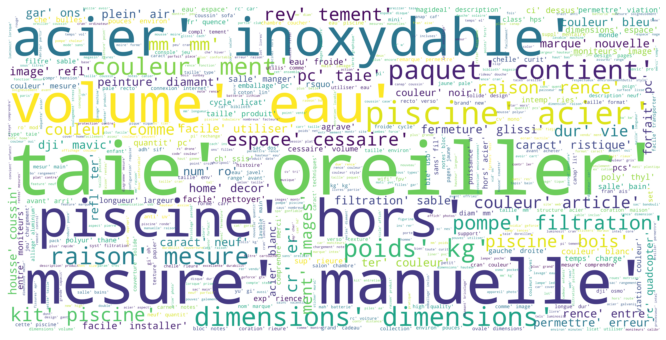

In [70]:
# WORD CLOUD APRES AJOUT LISTE NETTOYAGE
word_cloud_text = ''.join(headlines)

wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=1000, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()

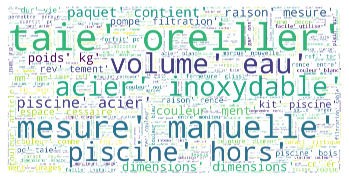

In [6]:
# WORD CLOUD A PARTIR DU FICHIER PICKLE
word_cloud_text = ''.join(new_dict)

wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=1000, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()

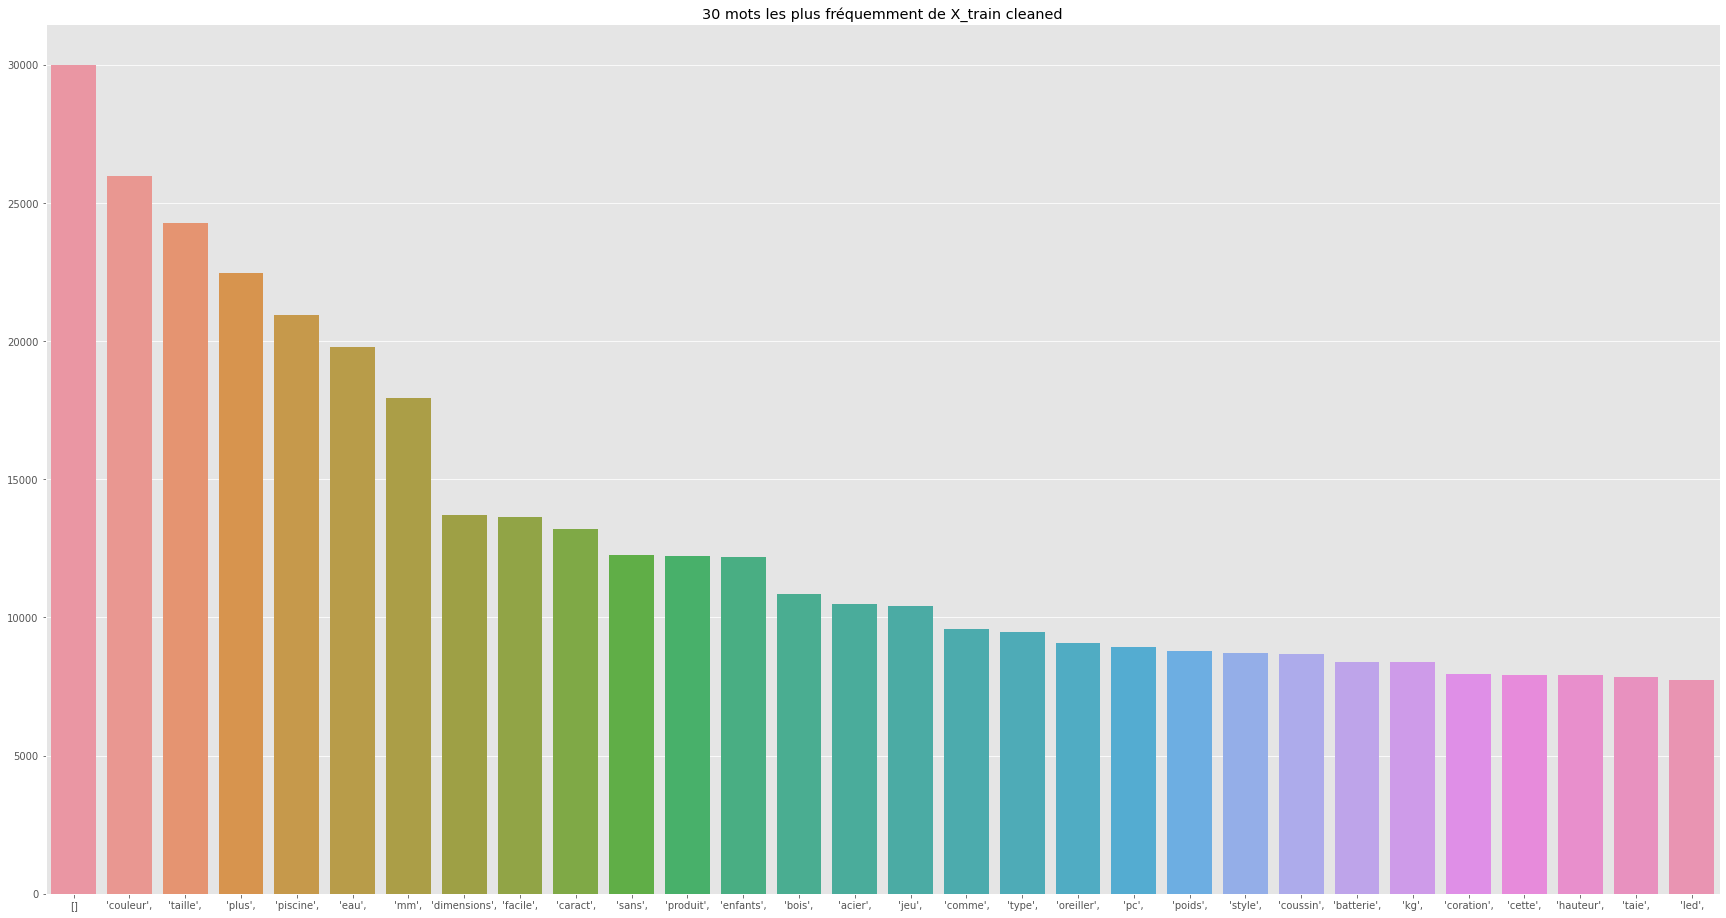

In [71]:
from collections import Counter
import seaborn as sns 
chaine = ' '.join(i for i in headlines) ###################
dico = Counter(chaine.split())
mots = [m[0] for m in dico.most_common(30)]
freq = [m[1] for m in dico.most_common(30)]

plt.figure(figsize= (30,16))
sns.barplot(x=mots, y=freq)
plt.title('30 mots les plus fréquemment de X_train cleaned');

In [13]:
# ETUDE DE LA TARGET
target = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TRAINING DATASCIENTEST/PROJET DATASCIENTEST/Archivage datas projets RAKUTEN/Y_train_CVw08PX.csv',index_col=0)
df['target'] =target

In [14]:
df['target'] = target #on rajoute y_train dans X_train temporairement pour simplifier la tache

df.head(1)

,designation,description,productid,imageid,target
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046,10


In [15]:
newdf = pd.DataFrame({'Features': new_dict})

In [16]:
newdf.head()

,Features
0,"['olivia', 'personalisiertes', 'notizbuch', 's..."
1,"['journal', 'arts', 'art', 'marche', 'salon', ..."
2,"['grand', 'stylet', 'ergonomique', 'bleu', 'ga..."
3,"['peluche', 'donald', 'europe', 'disneyland', ..."
4,"['guerre', 'tuques'] ['luc', 'grandeur', 'veut..."


In [17]:
from sklearn.model_selection import train_test_split

X= newdf['Features']
y= target['prdtypecode']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, test_size = 0.07, random_state = 0)

In [18]:
print(X_train.shape, X_test.shape)

(16983,) (5945,)


In [19]:
print(y_train.shape, y_test.shape)

(16983,) (5945,)


In [78]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() 


In [79]:
# Mettre à jour la valeur de X_train et X_test
X_train = cv.fit_transform(X_train).todense()
X_test = cv.transform(X_test).todense()

In [35]:
from sklearn.linear_model import LogisticRegression
from time import time
t0 = time()
clf = LogisticRegression(C=1.0).fit(X_train, y_train)

y_pred=clf.predict(X_test)

tt = time() - t0
print("Réalisé en {} secondes".format(round(tt,3)))

Réalisé en 606.575 secondes


In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))   # target_names=target_names

              precision    recall  f1-score   support

          10       0.31      0.66      0.42       199
          40       0.54      0.52      0.53       181
          50       0.71      0.66      0.68       117
          60       0.88      0.82      0.85        61
        1140       0.76      0.69      0.72       192
        1160       0.87      0.90      0.89       292
        1180       0.77      0.43      0.55        56
        1280       0.59      0.54      0.56       334
        1281       0.51      0.46      0.49       124
        1300       0.85      0.82      0.84       369
        1301       1.00      0.77      0.87        62
        1302       0.78      0.61      0.68       186
        1320       0.69      0.65      0.67       214
        1560       0.78      0.77      0.78       347
        1920       0.88      0.86      0.87       287
        1940       1.00      0.71      0.83        42
        2060       0.75      0.72      0.74       352
        2220       1.00    

In [ ]:
from sklearn.svm import LinearSVC
clf2 = LinearSVC(C=1.0).fit(X_train, y_train)

y_pred2=clf2.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))   # target_names=target_names

              precision    recall  f1-score   support

          10       0.35      0.47      0.40       199
          40       0.51      0.56      0.53       181
          50       0.64      0.67      0.65       117
          60       0.85      0.84      0.84        61
        1140       0.72      0.68      0.70       192
        1160       0.88      0.91      0.89       292
        1180       0.57      0.55      0.56        56
        1280       0.55      0.49      0.52       334
        1281       0.47      0.44      0.46       124
        1300       0.82      0.82      0.82       369
        1301       0.96      0.87      0.92        62
        1302       0.69      0.59      0.64       186
        1320       0.63      0.61      0.62       214
        1560       0.77      0.76      0.76       347
        1920       0.85      0.86      0.86       287
        1940       0.94      0.76      0.84        42
        2060       0.72      0.70      0.71       352
        2220       0.81    

In [ ]:
from sklearn.neural_network import MLPClassifier

clf3 = MLPClassifier(alpha=1, max_iter=100).fit(X_train, y_train)

y_pred3=clf3.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred3))   

              precision    recall  f1-score   support

          10       0.20      0.61      0.30       199
          40       0.48      0.48      0.48       181
          50       0.77      0.53      0.63       117
          60       0.90      0.75      0.82        61
        1140       0.77      0.58      0.66       192
        1160       0.87      0.85      0.86       292
        1180       0.00      0.00      0.00        56
        1280       0.63      0.49      0.55       334
        1281       0.56      0.44      0.50       124
        1300       0.83      0.86      0.85       369
        1301       1.00      0.68      0.81        62
        1302       0.78      0.58      0.66       186
        1320       0.65      0.57      0.61       214
        1560       0.76      0.75      0.75       347
        1920       0.90      0.80      0.85       287
        1940       0.92      0.57      0.71        42
        2060       0.73      0.74      0.73       352
        2220       0.95    

In [ ]:
from time import time
t0 = time()

tt = time() - t0
print("Réalisé en {} secondes".format(round(tt,3)))


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from time import time
t0 = time()

clf4 = AdaBoostClassifier(n_estimators=10, random_state=0).fit(X_train, y_train)
y_pred4=clf4.predict(X_test)

tt = time() - t0
print("Réalisé en {} secondes".format(round(tt,3)))


Réalisé en 283.181 secondes


In [ ]:
print(classification_report(y_test, y_pred4))   

              precision    recall  f1-score   support

          10       0.00      0.00      0.00       199
          40       0.00      0.00      0.00       181
          50       0.48      0.26      0.34       117
          60       0.85      0.75      0.80        61
        1140       0.00      0.00      0.00       192
        1160       0.00      0.00      0.00       292
        1180       0.00      0.00      0.00        56
        1280       0.00      0.00      0.00       334
        1281       0.00      0.00      0.00       124
        1300       0.00      0.00      0.00       369
        1301       1.00      0.53      0.69        62
        1302       0.00      0.00      0.00       186
        1320       0.00      0.00      0.00       214
        1560       0.00      0.00      0.00       347
        1920       0.95      0.62      0.75       287
        1940       0.00      0.00      0.00        42
        2060       0.00      0.00      0.00       352
        2220       0.00    

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf10 = LogisticRegression(C=1, random_state=1)
clf20 = RandomForestClassifier(n_estimators=10, random_state=1)
clf30 = GaussianNB()

from time import time
t0 = time()

clf5 = VotingClassifier(estimators=[
        ('lr', clf10), ('rf', clf20), ('gnb', clf30)], voting='hard')
clf5 = clf5.fit(X_train, y_train)

y_pred5=clf5.predict(X_test)

tt = time() - t0
print("Réalisé en {} secondes".format(round(tt,3)))

Réalisé en 772.33 secondes


In [ ]:
print(classification_report(y_test, y_pred5)) 

              precision    recall  f1-score   support

          10       0.29      0.67      0.41       199
          40       0.49      0.60      0.54       181
          50       0.67      0.71      0.69       117
          60       0.88      0.80      0.84        61
        1140       0.69      0.72      0.70       192
        1160       0.82      0.91      0.86       292
        1180       0.69      0.39      0.50        56
        1280       0.52      0.59      0.56       334
        1281       0.46      0.40      0.43       124
        1300       0.81      0.88      0.84       369
        1301       0.90      0.73      0.80        62
        1302       0.75      0.59      0.66       186
        1320       0.68      0.63      0.65       214
        1560       0.70      0.75      0.73       347
        1920       0.88      0.84      0.86       287
        1940       0.91      0.69      0.78        42
        2060       0.75      0.72      0.73       352
        2220       0.97    

# https://xgboost.readthedocs.io/en/latest/python/python_intro.html#data-interface

In [26]:
import xgboost as xgb

In [81]:
# features_matrix= pd.get_dummies(newdf['Features'])

In [82]:
# target= target['prdtypecode']

In [83]:
from sklearn.model_selection import train_test_split

In [ ]:
# X, X_valid, y, y_valid = train_test_split(features_matrix, target, test_size=0.1)
# X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

In [21]:
X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TRAINING DATASCIENTEST/PROJET DATASCIENTEST/Archivage datas projets RAKUTEN/X_train_update.csv',index_col=0)
y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TRAINING DATASCIENTEST/PROJET DATASCIENTEST/Archivage datas projets RAKUTEN/Y_train_CVw08PX.csv',index_col=0)

In [22]:
features_matrix = X 
target = y

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features_matrix , target, test_size = 0.1)
X_train, X_val, y_train, y_val = train_test_split(features_matrix , target, test_size = 0.2)

In [24]:
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)
X_test = pd.get_dummies(X_test)

In [ ]:
##BUGGG

In [ ]:
train = xgb.DMatrix(X_train, y_train) 
valid = xgb.DMatrix(X_val, y_val) 
test = xgb.DMatrix(X_test, y_test) 

In [ ]:
#### SI CA MARCHE REPARTIR DE LA

In [ ]:
params = {'booster':'gbtree', 'learning_rate': 0.07, 'objective': 'multi:softmax'} #

from time import time
t0 = time()
xgb1 = xgb.train(params = params,
                dtrain = train, 
                num_boost_round= 100,
                evals= [(train, 'train'), (test, 'eval')])
tt = time() - t0
print("Réalisé en {} secondes".format(round(tt,3)))

In [ ]:
preds = xgb2.predict(test)

xgbpreds= pd.Series(np.where(preds > 0.5, 1, 0))

pd.crosstab(xgbpreds, pd.Series(y_valid))